# Assignment 1: Time Series Forecast With Python (Seasonal ARIMA)

**Lecturer**: Vincent Claes<br>
**Authors:** Bryan Honof, Jeffrey Gorissen<br>
**Start Date:** 19/10/2018
    
**Objective:** Visualize and predict the future temperatures via ARIMA

**Description:** In this notebook we fit and forecast with the model

## Table of contents

1. [Import libraries](#Import-Libraries)
2. [Load in the data](#load-data)
3. [Fit the model](#fit-the-model)
4. [Validate the model](#validate-the-model)
5. [Forecast the future!](#forecast-the-future)<br>
    a. [one day ahead of time](#one-day)  
    a. [one hour ahead of time](#one-hour)

## 1. Import Libraries <a name="Import-Libraries"></a>

In [1]:
import warnings
import itertools

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.style.use('fivethirtyeight')

## 2. Load in the data <a name="load-data"></a>

In [2]:
data_csv = pd.read_csv('./data/data.csv')
data = pd.DataFrame()

# Convert the creation_date column to datetime64
data['dateTime'] = pd.to_datetime(data_csv['dateTime'])
# Convert the value column to float
data['temperature'] = pd.to_numeric(data_csv['temperature'])

# Set the dateTime column as index
data = data.set_index(['dateTime'])

# Sort the dataFrame just to be sure...
data = data.sort_index()

data = data.dropna()

# Double check the results
data.info()

df = data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 351 entries, 2018-11-10 23:00:00 to 2018-11-25 13:00:00
Data columns (total 1 columns):
temperature    351 non-null float64
dtypes: float64(1)
memory usage: 5.5 KB


In [3]:
df.tail(5)

,temperature
dateTime,
2018-11-25 09:00:00,18.32
2018-11-25 10:00:00,17.99
2018-11-25 11:00:00,17.66
2018-11-25 12:00:00,18.62
2018-11-25 13:00:00,17.59


## 3. Fit the model <a name="fit-the-model"></a>

In [4]:
mod = SARIMAX(df,
              order=(2, 0, 2),
              seasonal_order=(1, 1, 2, 24),
              enforce_stationarity=False,
              enforce_invertibility=False,
              freq='H')

results = mod.fit()

print(results.summary())

/home/bryan/.conda/envs/pxl/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        temperature   No. Observations:                  351
Model:             SARIMAX(2, 0, 2)x(1, 1, 2, 24)   Log Likelihood                -340.492
Date:                            Sun, 25 Nov 2018   AIC                            696.985
Time:                                    14:44:36   BIC                            725.948
Sample:                                11-10-2018   HQIC                           708.607
                                     - 11-25-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7229      0.057     30.440      0.000       1.612       1.834
ar.L2         -0.7262      0.055   

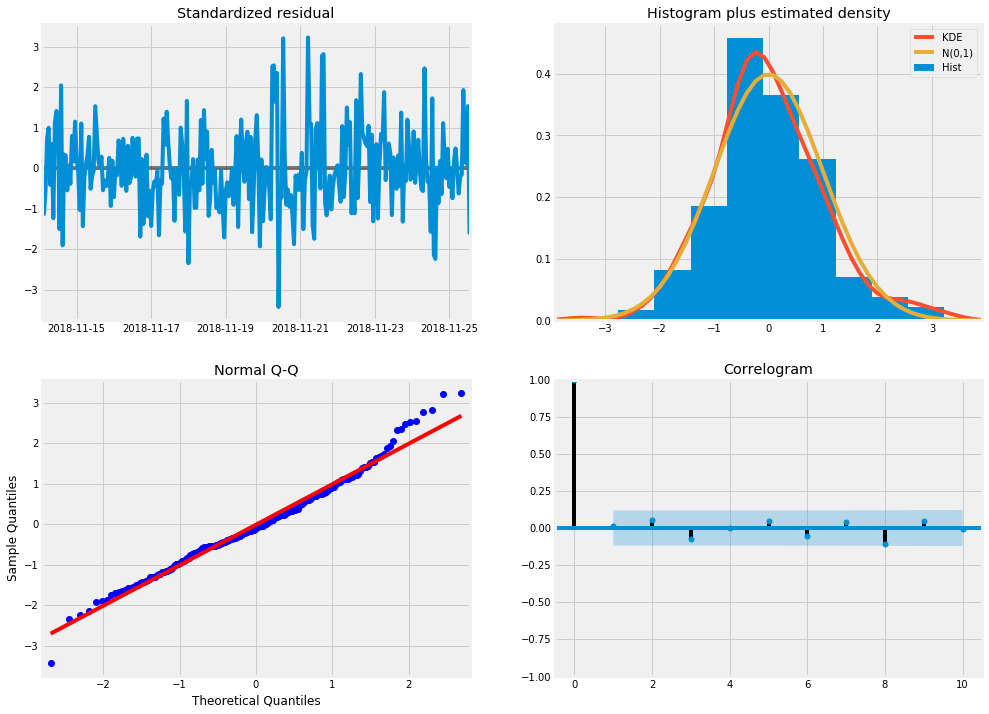

In [5]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

## 4. Validate the model <a name="validate-the-model"></a>

In [6]:
pred = results.get_prediction(start=pd.to_datetime('2018-11-13 03:00:00'), dynamic=False)
pred_ci = pred.conf_int()

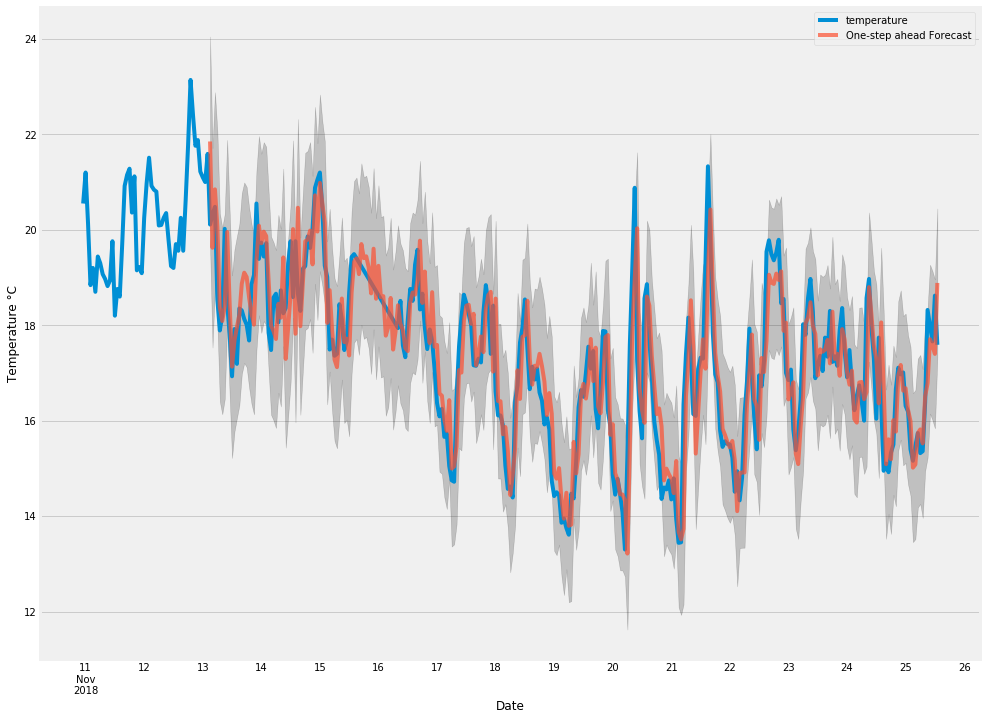

In [7]:
ax = df.plot(label='observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature °C')
plt.legend()

plt.show()

## 5. Forecast the future! <a name="forecast-the-future"></a>

### a. one day ahead of time <a name="one-day"></a>

In [8]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

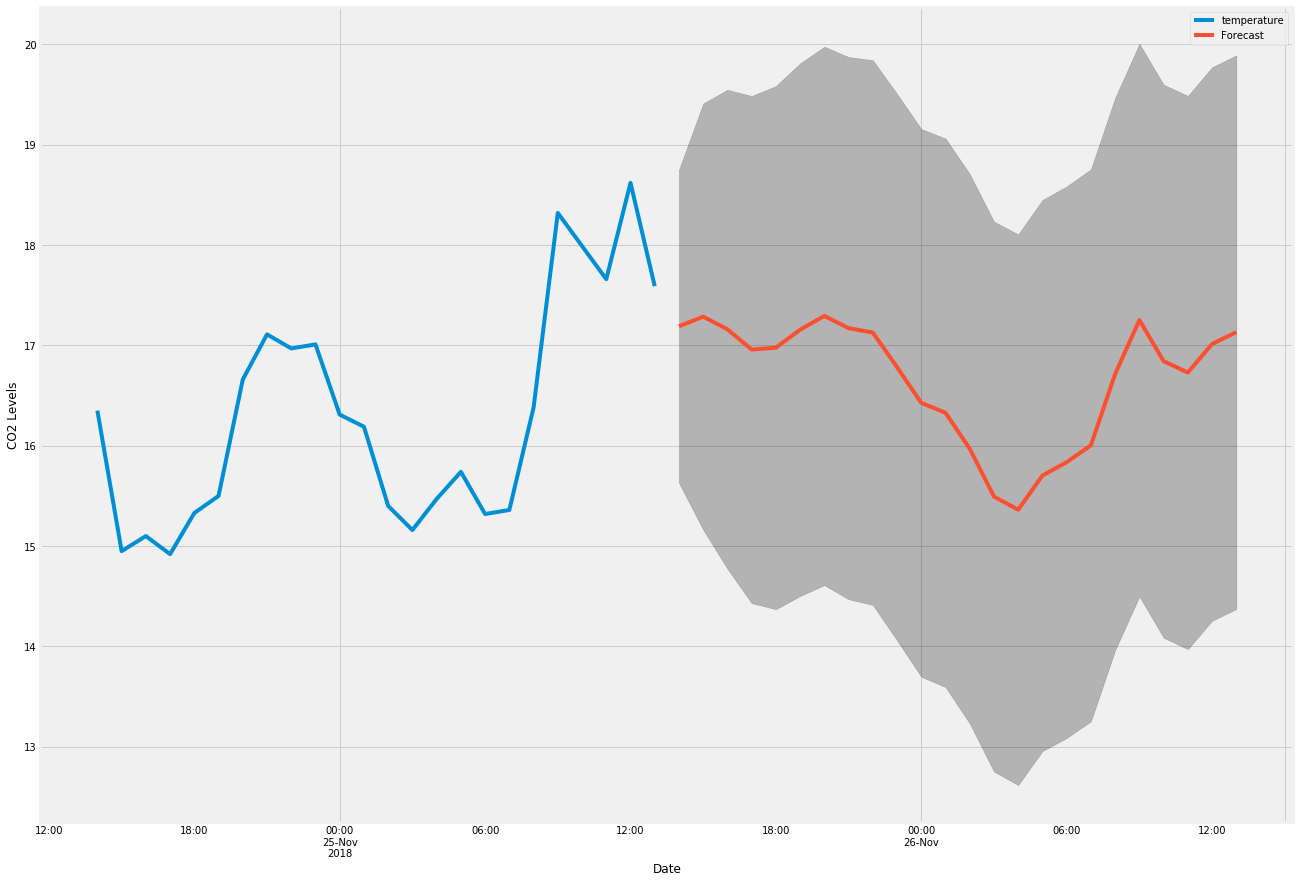

In [9]:
ax = df.last('D').plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

### a. one hour ahead of time <a name="one-hour"></a>

In [10]:
# Get forecast 1 steps ahead in future
# We use 2 steps here to be able to plot it.
pred_uc = results.get_forecast(steps=2)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [11]:
print(pred_uc.tvalues)

[21.59686204 15.9549732 ]


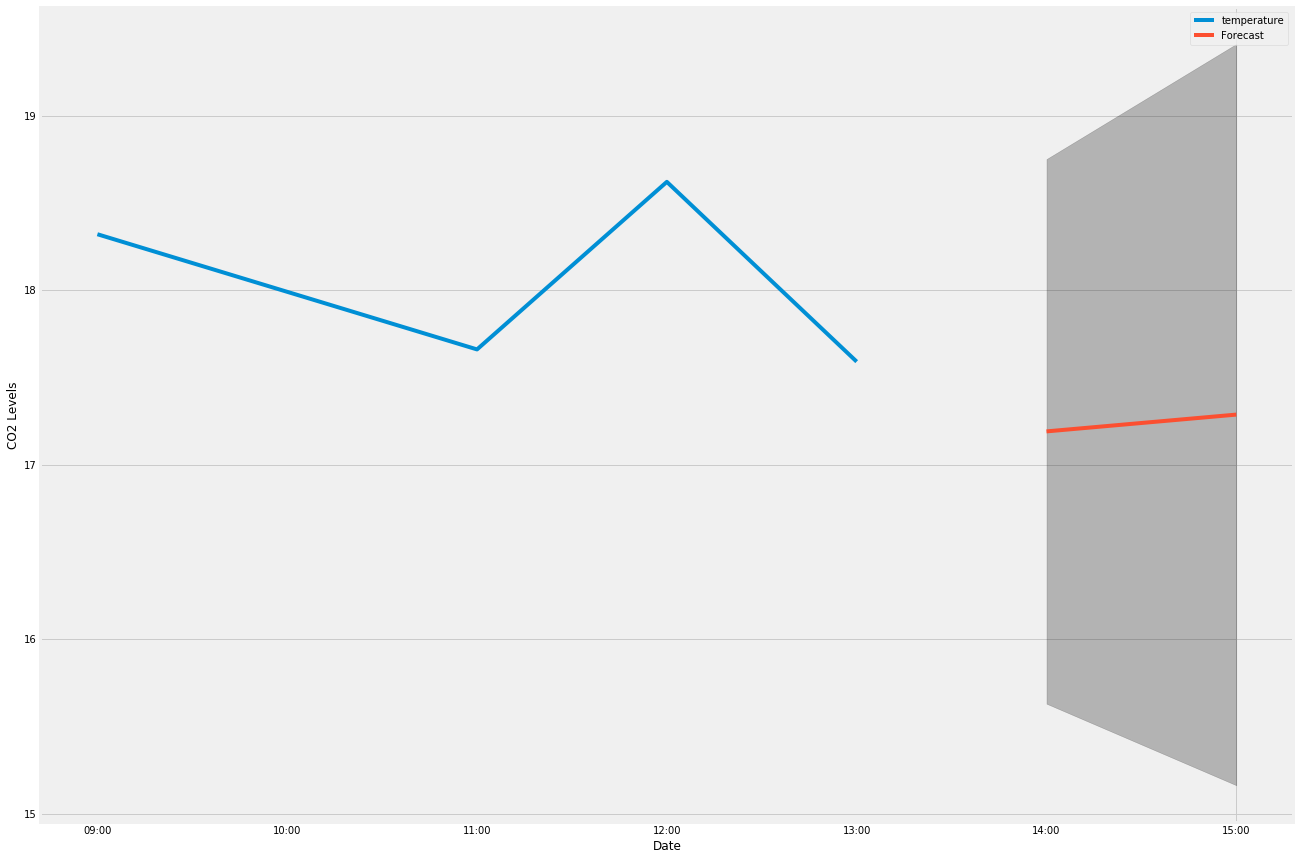

In [12]:
ax = df.last('5H').plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

**[⬆ back to top](#table-of-contents)** <br>
[back to first notebook](./1_entry_notebook.ipynb)